## Линейная регрессия

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

#### Работа со встроенными даннами в scikit-learn

Набор данных Boston House Prices

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [5]:
data = boston.data
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
data.shape

(506, 13)

In [7]:
target = boston.target

In [8]:
feature_names = boston.feature_names
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Описание датасета:

In [9]:
for i in boston.DESCR.split("\n"):
    print(i)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Создадим два датафрейма:

In [10]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [12]:
y = pd.DataFrame(target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [13]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


Разбиение данных на тренировачный и тестовый датасет

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42) 

Построение Линейной модели регрессии

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(X_train,y_train)

LinearRegression()

In [19]:
y_pred=lr.predict(X_test)

In [20]:
check_test = pd.DataFrame({'y_test':y_test['price'],
                          'y_pred':y_pred.flatten()},
                         columns=['y_test','y_pred'])
check_test.head()

,y_test,y_pred
173,23.6,28.838854
274,32.4,36.007833
491,13.6,15.083248
72,22.8,25.230909
452,16.1,18.878641


Метрики оценки качества моделей:

Средняя квадратичная ошибка:

In [22]:
check_test['error']=check_test['y_pred']-check_test['y_test']
check_test.head()

,y_test,y_pred,error
173,23.6,28.838854,5.238854
274,32.4,36.007833,3.607833
491,13.6,15.083248,1.483248
72,22.8,25.230909,2.430909
452,16.1,18.878641,2.778641


In [23]:
initial_mse = (check_test['error']**2).mean()
initial_mse

22.098694827098488

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
initial_mse = mean_squared_error(y_test,y_pred)
initial_mse

22.098694827098488

In [26]:
np.abs(check_test['error']).mean()

3.0609395954370924

In [28]:
from sklearn.metrics import mean_absolute_error

In [29]:
mean_absolute_error(y_test,y_pred)

3.060939595437094

R**2

In [30]:
from sklearn.metrics import r2_score

In [31]:
r2_score(y_test,y_pred)

0.6844267283527059

Просмотр коффициэнтов линеййной модели

In [33]:
lr.intercept_

array([29.83642016])

In [34]:
lr.coef_

array([[-1.28322638e-01,  2.95517751e-02,  4.88590934e-02,
         2.77350326e+00, -1.62388292e+01,  4.36875476e+00,
        -9.24808158e-03, -1.40086668e+00,  2.57761243e-01,
        -9.95694820e-03, -9.23122944e-01,  1.31854199e-02,
        -5.17639519e-01]])

In [35]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = 6, 4

%matplotlib inline
%config InlineBackend.figure_format='svg'

<BarContainer object of 13 artists>

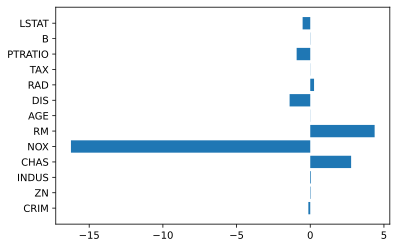

In [37]:
plt.barh(X_train.columns, lr.coef_.flatten())

In [38]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.468655,11.596306,11.119974,0.076517,0.558326,6.323496,69.147230,3.763440,9.361478,405.311346,18.263852,358.767124,12.513298
std,8.313983,23.093394,6.953401,0.266175,0.119118,0.720086,27.703149,2.112633,8.601322,166.060463,2.263954,87.511867,7.147690
min,0.009060,0.000000,1.210000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081930,0.000000,5.130000,0.000000,0.453000,5.890000,46.250000,2.075400,4.000000,279.000000,16.600000,376.140000,6.865000
50%,0.269380,0.000000,9.690000,0.000000,0.538000,6.226000,78.100000,3.112100,5.000000,330.000000,18.600000,391.340000,11.220000
75%,3.242325,20.000000,18.100000,0.000000,0.639000,6.664500,93.850000,5.250950,16.000000,666.000000,20.200000,395.760000,16.395000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Стандартизация признаков

In [39]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaled = StandardScaler()

In [46]:
X_train_scaled = scaled.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.406795,-0.502812,-1.247076,-0.287849,-0.591174,1.156255,0.833235,-0.503753,-0.740571,-1.280208,-0.205157,0.404512,-1.077756
1,0.007992,-0.502812,1.218283,3.474042,2.628380,-0.238475,0.486246,-0.956440,-0.507741,-0.013937,-1.576252,-3.098037,0.351165
2,-0.413450,0.364381,-1.121792,-0.287849,-0.970291,2.080976,-0.167973,0.441388,-0.507741,-1.141522,-1.487795,0.326591,-1.226252
3,-0.371107,-0.502812,2.092391,-0.287849,0.190598,-0.987986,0.956127,-0.950895,-0.856986,-1.310358,0.369819,0.005983,2.065870
4,-0.409661,-0.502812,-1.134753,-0.287849,-0.826546,0.013216,-1.877617,0.687804,-0.624156,0.148869,-0.603217,0.188141,-0.724729


In [47]:
X_test_scaled = scaled.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_test_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.406705,-0.502812,-1.018109,-0.287849,-0.406239,0.128632,0.540463,-0.529489,-0.507741,-0.659132,-0.735903,0.420302,-0.486575
1,-0.410961,1.231575,-0.678258,3.474042,-0.935826,0.604203,-1.310145,0.148902,-0.624156,-0.912387,-0.293614,0.436321,-1.258473
2,-0.405024,-0.502812,2.393361,-0.287849,0.425970,-0.473480,1.071790,-0.898332,-0.624156,1.843261,0.812108,0.358629,0.778440
3,-0.406722,-0.502812,-0.044638,-0.287849,-1.221635,-0.359454,-2.217377,0.722262,-0.624156,-0.604864,0.414048,0.367783,-0.979693
4,0.195293,-0.502812,1.005156,-0.287849,1.300209,-0.036844,0.818777,-0.661300,1.704142,1.571917,0.856337,0.301190,0.666368


In [48]:
lr.fit(X_train_scaled,y_train)

LinearRegression()

Text(0.5, 0, 'Вес признака')

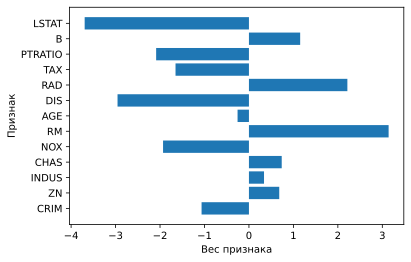

In [52]:
plt.barh(X_train_scaled.columns,lr.coef_.flatten());
plt.ylabel('Признак')
plt.xlabel('Вес признака')

In [54]:
feats = ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM',  'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

In [55]:
def create_model(X_train, y_train,X_test, y_test,feats, model):
    model.fit(X_train.loc[:,feats], y_train)
    y_pred = model.predict(X_test.loc[:,feats])
    mse=mean_squared_error(y_test,y_pred)
    return mse
    

In [56]:
create_model(X_train_scaled,y_train,X_test_scaled,y_test,feats,LinearRegression())

21.79024941647526

In [57]:
# Сверяем с исходной mse
initial_mse

22.098694827098488

### Модели линейной регрессии с регуляризацией

In [58]:
from sklearn.linear_model import Lasso, Ridge

Lasso (линейная регрессия с L1-регуляризацией)

In [59]:
# Параметр альфа отвечает за регуляризацию
model=Lasso(alpha=0.003)

In [60]:
create_model(X_train_scaled,y_train,X_test_scaled,y_test,feats,model)

21.811408732029225

Ridge (линейная регрессия с L2-регуляризацией)

In [61]:
# Параметр альфа отвечает за регуляризацию
model=Ridge(alpha=0.001)

In [62]:
create_model(X_train_scaled,y_train,X_test_scaled,y_test,feats,model)

21.79027835256982